Скачайте файл с предложениями (sentences.txt).
Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [72]:
import numpy as np
import scipy
import re
from collections import Iterable

sentence = []
text = []


with open('sentences.txt') as f:
    lines = f.readlines()
    for line in lines:
        line_lower = line.lower()
        sentence = re.compile(r"[^a-z]+").split(line_lower)
        sentence.pop()
        text.append(sentence)
f.close()    

Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [73]:
sentence_counts = {}

for sentence in text:
    for word in sentence:
        if word in sentence_counts:
            sentence_counts[word] += 1
        else:
            sentence_counts[word] = 1
print(sentence_counts)

{'in': 11, 'comparison': 1, 'to': 14, 'dogs': 1, 'cats': 4, 'have': 2, 'not': 1, 'undergone': 1, 'major': 2, 'changes': 2, 'during': 1, 'the': 20, 'domestication': 1, 'process': 2, 'as': 6, 'cat': 10, 'simply': 2, 'catenates': 1, 'streams': 1, 'of': 19, 'bytes': 2, 'it': 4, 'can': 3, 'be': 3, 'also': 2, 'used': 1, 'concatenate': 2, 'binary': 1, 'files': 1, 'where': 2, 'will': 2, 'just': 3, 'sequence': 2, 'a': 13, 'common': 1, 'interactive': 1, 'use': 2, 'for': 4, 'single': 1, 'file': 5, 'is': 7, 'output': 3, 'content': 2, 'standard': 1, 'hear': 1, 'sounds': 1, 'too': 2, 'faint': 1, 'or': 3, 'high': 1, 'frequency': 1, 'human': 2, 'ears': 1, 'such': 2, 'those': 1, 'made': 1, 'by': 3, 'mice': 1, 'and': 14, 'other': 2, 'small': 2, 'animals': 1, 'one': 4, 'people': 1, 'deliberately': 1, 'tamed': 1, 'artificial': 1, 'selection': 1, 'they': 1, 'were': 2, 'useful': 1, 'predators': 1, 'vermin': 1, 'domesticated': 1, 'its': 2, 'closest': 1, 'wild': 1, 'ancestor': 1, 'are': 2, 'both': 1, 'diploid

Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [85]:
#matrix = np.zeros((len(text), len(sentence_counts)))
result = [[sentence.count(word) for word in list(sentence_counts.keys())] for sentence in text]
matrix = np.array(result)
print(matrix.shape)  

(22, 254)


Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?
Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [134]:
import scipy.spatial.distance

from heapq import nsmallest

def second_smallest(numbers):
    return nsmallest(2, numbers)[-1]

def third_smallest(numbers):
    return nsmallest(3, numbers)[-1]

dists = []
dists_dict = {}
for row in matrix:
    dists.append(scipy.spatial.distance.cosine(matrix[0,:], row))

dists_dict=dict(enumerate(dists))

second_smallest = second_smallest(dists_dict.values())
third_smallest = third_smallest(dists_dict.values())
res = [k for k, v in dists_dict.items() if v==second_smallest or v==third_smallest]

with open('submission-1.txt', 'w') as g:
        print("{} {}".format(min(res), max(res)), file = g)

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

[ 3.43914511 -0.18692825]


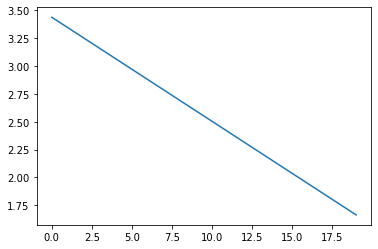

In [149]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

n = [1,15]

A = np.array([[1,1],[1,15]])
b = []

for i in n:
    b_v = f(i)
    b.append(b_v)

solve = np.linalg.solve(A,b)

x = np.arange(0,10,0.5)
y = solve[0] + solve[1] * x
plt.plot(y)

print(solve)

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

[ 3.32512949 -0.06531159 -0.00760104]


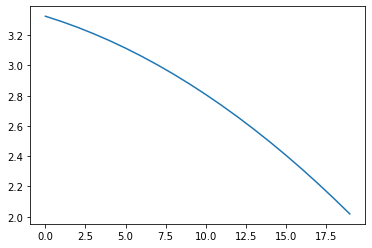

In [150]:
import math 

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

n = [1,8,15]

A = np.array([[1,1,1],[1,8,64],[1,15,225]])
b = []

for i in n:
    b_v = f(i)
    b.append(b_v)

solve = np.linalg.solve(A,b)
print(solve)

x = np.arange(0,10,0.5)
y = solve[0] + solve[1] * x + solve[2] * x ** 2
plt.plot(y)

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


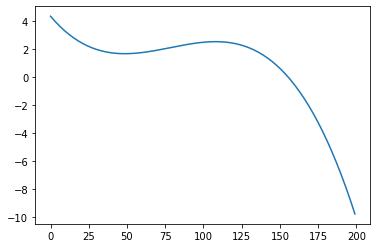

In [156]:
import math 

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

n = [1,4,10,15]

A = np.array([[1,1,1,1],[1,4,16,64],[1,10,100,1000],[1,15,225,3375]])
b = []

for i in n:
    b_v = f(i)
    b.append(b_v)

solve = np.linalg.solve(A,b)
print(solve)

x = np.arange(0,20,0.1)
y = solve[0] + solve[1] * x + solve[2] * x ** 2 + solve[3] * x ** 3
plt.plot(y)
with open('submission-2.txt', 'w') as g:
        print("{} {} {} {}".format(solve[0], solve[1], solve[2], solve[3]), file = g)